In [328]:
import pandas as pd

In [329]:
X_raw = pd.read_csv('auto.csv', header = None, na_values = ['?'])
X_raw.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [330]:
# последний столбец - это стоимость авто, мы ее и будем предсказывать (целевая переменная)

In [332]:
X_raw[25].isna().sum()

4

In [333]:
X_raw = X_raw[X_raw[25].notna()]
X_raw.shape

(201, 26)

In [334]:
y = X_raw[25]
X_raw = X_raw.drop(25, axis = 1)
# исключаем столбец с целевой переменной

In [336]:
X_raw.shape, len(y)

((201, 25), 201)

In [338]:
# Дальше у нас идет предобработка данных. Она важна при применении любых методов ML, а в особенности для линейных моделей. 
# В sklearn предобработку данных удобно делать с помощью модуля preprocessing или методов библиотеки pandas

In [339]:
from sklearn import impute

In [343]:
# В матрице объекты-признаки могут быть пропущенные значения и это вызовет исключюения при попытке передать такую матрицу 
# в функцию обучения модели или даже предобработки. Если пропусков немного, можно удалить объекты с пропусками из обучающей выборки.
# Заполнить пропуски можно разными способами: 
# - заполнить средними (медиана или среднее)
# - предсказывать пропущенные значения по непропущенным

In [344]:
# для удобства работы с нашим датасетом создаем маску, указывающем на столбцы с текстовым типом данных 
cat_features_mask = (X_raw.dtypes == 'object').values 
cat_features_mask

array([False, False,  True,  True,  True,  True,  True,  True,  True,
       False, False, False, False, False,  True,  True, False,  True,
       False, False, False, False, False, False, False])

In [346]:
# для вещественнозначных признаков заполним пропускими средними

In [347]:
X_real = X_raw[X_raw.columns[~cat_features_mask]]
mis_replacer = impute.SimpleImputer(strategy = 'mean')
X_no_mis_real = pd.DataFrame(data = mis_replacer.fit_transform(X_real), columns = X_real.columns)

# для категориальных - пустыми строками
X_cat = X_raw[X_raw.columns[cat_features_mask]].fillna("")
X_cat.reset_index(drop = True, inplace = True)

X_no_mis = pd.concat([X_no_mis_real, X_cat], axis = 1)

In [350]:
X_no_mis_real.shape, X_cat.shape, X_no_mis.shape

((201, 15), (201, 10), (201, 25))

In [351]:
X_no_mis.head()

,0,1,9,10,11,12,13,16,18,19,...,2,3,4,5,6,7,8,14,15,17
0,3.0,122.0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,...,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,3.0,122.0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,...,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,1.0,122.0,94.5,171.2,65.5,52.4,2823.0,152.0,2.68,3.47,...,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,2.0,164.0,99.8,176.6,66.2,54.3,2337.0,109.0,3.19,3.40,...,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,2.0,164.0,99.4,176.6,66.4,54.3,2824.0,136.0,3.19,3.40,...,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi


In [352]:
X_no_mis.isna().sum().sum()
# видим что больше нет пустых строк

0

In [353]:
# всегда важно понимать, случайны ли пропуски в каком-то признаке. Иногда факт отсутствия информации о значении признака 
# может быть важным признаком который необходимо добавить к другим признакам. 

In [355]:
X_dum = pd.get_dummies(X_no_mis, drop_first = True).astype('float')
X_dum.columns = X_dum.columns.astype('str')
# drop_first - означает, что мы выкидываем одну из категорий, чтобы не было перебоучения модели, так как уже понятно, что 
# если один признак равен условно 1, то остальные равны 0
print(X_dum.shape)
X_dum.head()

(201, 65)


,0,1,9,10,11,12,13,16,18,19,...,15_three,15_twelve,15_two,17_2bbl,17_4bbl,17_idi,17_mfi,17_mpfi,17_spdi,17_spfi
0,3.0,122.0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,3.0,122.0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,122.0,94.5,171.2,65.5,52.4,2823.0,152.0,2.68,3.47,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,2.0,164.0,99.8,176.6,66.2,54.3,2337.0,109.0,3.19,3.40,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,2.0,164.0,99.4,176.6,66.4,54.3,2824.0,136.0,3.19,3.40,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [357]:
 # теперь нужно масшатбировать для того чтобы обучить линейную модель

In [360]:
# При работе с данными всегда рекомендуется приводить все признаки к одному масштабу. Это важно по причинам: 
# - ускорение обучения модели
# - улучшение численной устойчивости при работе с матрицей объекты-признаки (рядом с нулем с плавающей точкой больше, чем 
# с области больших чисел)
# - для линейных моделей: интерпретация весов при признаках как меры их значимости.

In [361]:
# Первый популярный способ масштабирования - это нормализация: вычитание среднего из каждого признака и деление на 
# стандартное отклонение (StandardScaler в sklearn). Второй популярный способ: вычитание минимума из каждого признака, 
# а затем деление на разницу максимального и минимального значения (MinMaxScaler в sklearn)

In [362]:
from sklearn import preprocessing

In [367]:
normalizer = preprocessing.MinMaxScaler()
X_real_norm_np = normalizer.fit_transform(X_dum)
X = pd.DataFrame(data = X_real_norm_np)

In [368]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,1.0,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.6,0.298429,0.230321,0.449254,0.444444,0.383333,0.517843,0.343396,0.100000,0.666667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.8,0.518325,0.384840,0.529851,0.504274,0.541667,0.329325,0.181132,0.464286,0.633333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.8,0.518325,0.373178,0.529851,0.521368,0.541667,0.518231,0.283019,0.464286,0.633333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [372]:
# ОБУЧЕНИЕ МОДЕЛИ И ОЦЕНКА КАЧЕСТВА 

In [374]:
from sklearn.model_selection import train_test_split

In [377]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.25, random_state = 123)

In [378]:
Xtrain.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
112,0.4,0.502618,0.620991,0.680597,0.692308,0.741667,0.615593,0.222642,0.657143,0.533333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
42,0.4,0.298429,0.224490,0.441791,0.128205,0.475000,0.329325,0.188679,0.550000,0.552381,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
193,0.2,0.047120,0.516035,0.711940,0.589744,0.808333,0.602793,0.301887,0.885714,0.514286,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
192,0.0,0.198953,0.516035,0.711940,0.589744,0.700000,0.561288,0.301887,0.885714,0.514286,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
107,0.4,0.298429,0.804665,0.862687,0.692308,0.908333,0.753297,0.343396,0.828571,0.690476,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [379]:
# сначала обучим классическую линейную регрессию, работающую по аналитической формуле

In [382]:
from sklearn.linear_model import LinearRegression

In [383]:
model = LinearRegression()
model.fit(Xtrain, ytrain)

LinearRegression()

In [385]:
pred_mse = model.predict(Xtest)
pred_mse

array([7.12875000e+03, 5.89625000e+03, 9.85537500e+03, 5.01275000e+03,
       7.36387500e+03, 8.85062500e+03, 1.10387500e+04, 1.35125000e+04,
       1.10177500e+04, 8.02662500e+03, 8.73462500e+03, 4.68412500e+03,
       4.16075000e+03, 8.83387500e+03, 1.21561250e+04, 5.49500000e+03,
       1.51466250e+04, 8.99250000e+03, 1.20415000e+04, 6.47562500e+03,
       8.96512500e+03, 5.65325000e+03, 8.85812500e+03, 8.64100000e+03,
       1.17221250e+04, 9.33728816e+15, 9.30675000e+03, 1.17802500e+04,
       7.43275000e+03, 1.35125000e+04, 1.37407500e+04, 5.67350000e+03,
       1.53300000e+04, 1.73376250e+04, 8.06687500e+03, 9.09462500e+03,
       1.54707500e+04, 7.71862500e+03, 4.99037500e+03, 2.73461250e+04,
       7.10625000e+03, 8.09707125e+16, 6.27337500e+03, 8.27750000e+03,
       6.14325000e+03, 9.00600000e+03, 1.57621250e+04, 1.74781250e+04,
       1.03748750e+04, 3.93265000e+04, 9.83537500e+03])

In [387]:
from sklearn.metrics import r2_score

In [391]:
r2_score(ytest, pred_mse)
# это очень большое отицательное число 
# это означает, что наша модель очень плохо предсказывает значение на тесте

-3.6933928168749564e+24

In [393]:
r2_score(ytrain, model.predict(Xtrain))
# а тут все очень хорошо

0.9753029887276083

(array([ 1.,  0.,  0.,  0., 31., 31.,  0.,  0.,  0.,  2.]),
 array([-9.55229187e+16, -7.64183349e+16, -5.73137512e+16, -3.82091675e+16,
        -1.91045837e+16,  2.49600000e+03,  1.91045837e+16,  3.82091675e+16,
         5.73137512e+16,  7.64183349e+16,  9.55229187e+16]),
 <BarContainer object of 10 artists>)

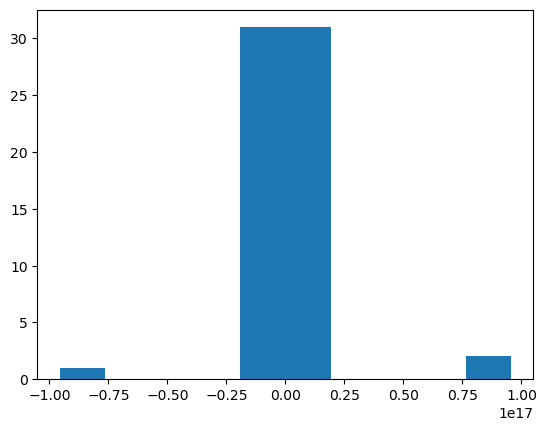

In [467]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.hist(model.coef_, bins = 10)

In [470]:
# то есть мы очень сильно переобучились
# почему так? скорее всего потому что у нас 201 объект и ЦЕЛЫХ 65 признаков - это очень маленькая выборка и очень большое количество 
# признаков

In [471]:
# добавим регуляризацию
# L1 - регуляризация: Lasso
# L2 - регуляризация: Ridge
# L1 + L2: ElasticNet

In [473]:
from sklearn.linear_model import Ridge, Lasso

In [475]:
model_12 = Ridge(alpha = 1)
model_12.fit(Xtrain, ytrain)
pred_12 = model_12.predict(Xtest)
r2_score(ytest, pred_12)

0.8315766274428091

In [477]:
r2_score(ytrain, model_12.predict(Xtrain))

0.9533372216376617

In [479]:
# делаем вывод: мы уже не переобучились, мы исправили ситуацию в лучшую сторону

(array([ 1.,  5.,  9., 19., 12.,  9.,  1.,  1.,  5.,  3.]),
 array([-4353.24537862, -3311.54722533, -2269.84907203, -1228.15091873,
         -186.45276543,   855.24538786,  1896.94354116,  2938.64169446,
         3980.33984776,  5022.03800105,  6063.73615435]),
 <BarContainer object of 10 artists>)

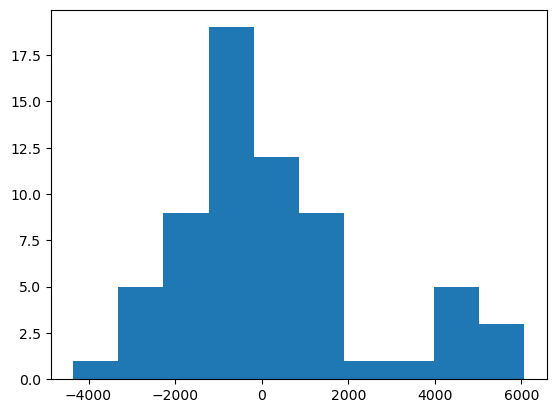

In [485]:
plt.hist(model_12.coef_, bins = 10)

In [487]:
# видим по рисункам, что веса снизились

In [489]:
# можно обучать модель градиентным спуском

In [491]:
from sklearn.linear_model import SGDRegressor

In [493]:
lr_mse = SGDRegressor()
lr_mse.fit(Xtrain, ytrain)
pred_mse = lr_mse.predict(Xtest)
r2_score(ytest, pred_mse)

0.8221763275215017

In [495]:
# можно использовать не MSE, а MAE при обучении модели

In [503]:
lr_mae = SGDRegressor(loss = 'epsilon_insensitive', epsilon = 0)
lr_mae.fit(Xtrain, ytrain)
pred_mae = lr_mae.predict(Xtest)
r2_score(ytest, pred_mse)

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


0.8221763275215017

In [508]:
# небольшое отступление. Среднеквадратичная и средняя абсолютная ошибка
# Кроме требований заказчика, функцоинал качества должен учитывать матмематические особенности модели, например, устойчивость
# к шумовым объектам. В линейной регрессии Mean Squared Erroe: L(yi, a(xi)) = (a(xi) - yi) ** 2 не обладает этим свойством, потому что 
# задает очень большие штрафы за большие отклонения от фактического значения. 
# Рассмотрим это явление на примере. Выберем один признак, от которго целевой признак (имеющий индекс 15 в матрице X) зависит практически
# линейно. Добавим к выборке два объекта-выборса и посмотрим как изменится оптимизированная на MSE прямая

In [510]:
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression as LR
import numpy as np

In [512]:
X[15].values

array([0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [520]:
X_subset = X[[7, 15]].values
X_subset_modified = np.vstack((X_subset, [[1, 90], [2, 50]]))
X_subset_modified

array([[2.60377358e-01, 0.00000000e+00],
       [2.60377358e-01, 0.00000000e+00],
       [3.43396226e-01, 0.00000000e+00],
       [1.81132075e-01, 1.00000000e+00],
       [2.83018868e-01, 1.00000000e+00],
       [2.83018868e-01, 1.00000000e+00],
       [2.83018868e-01, 1.00000000e+00],
       [2.83018868e-01, 1.00000000e+00],
       [2.64150943e-01, 1.00000000e+00],
       [1.77358491e-01, 0.00000000e+00],
       [1.77358491e-01, 0.00000000e+00],
       [3.88679245e-01, 0.00000000e+00],
       [3.88679245e-01, 0.00000000e+00],
       [3.88679245e-01, 0.00000000e+00],
       [5.58490566e-01, 0.00000000e+00],
       [5.58490566e-01, 0.00000000e+00],
       [5.58490566e-01, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00],
       [1.09433962e-01, 0.00000000e+00],
       [1.09433962e-01, 0.00000000e+00],
       [1.09433962e-01, 0.00000000e+00],
       [1.09433962e-01, 0.00000000e+00],
       [1.39622642e-01, 0.00000000e+00],
       [1.09433962e-01, 0.00000000e+00],
       [1.094339

In [522]:
X_subset

array([[0.26037736, 0.        ],
       [0.26037736, 0.        ],
       [0.34339623, 0.        ],
       [0.18113208, 1.        ],
       [0.28301887, 1.        ],
       [0.28301887, 1.        ],
       [0.28301887, 1.        ],
       [0.28301887, 1.        ],
       [0.26415094, 1.        ],
       [0.17735849, 0.        ],
       [0.17735849, 0.        ],
       [0.38867925, 0.        ],
       [0.38867925, 0.        ],
       [0.38867925, 0.        ],
       [0.55849057, 0.        ],
       [0.55849057, 0.        ],
       [0.55849057, 0.        ],
       [0.        , 0.        ],
       [0.10943396, 0.        ],
       [0.10943396, 0.        ],
       [0.10943396, 0.        ],
       [0.10943396, 0.        ],
       [0.13962264, 0.        ],
       [0.10943396, 0.        ],
       [0.10943396, 0.        ],
       [0.10943396, 0.        ],
       [0.13962264, 0.        ],
       [0.23018868, 0.        ],
       [0.35849057, 0.        ],
       [0.11698113, 0.        ],
       [0.

In [524]:
def scatter_points_and_plot_line_MSE(X_subset): 
    plt.scatter(X_subset[:, 0], X_subset[:, 1])
    lr = LR()
    lr.fit(X_subset[:, 0][:, np.newaxis], X_subset[:, 1])
    grid = np.linspace(0, 2, 100)
    line = lr.predict(grid[:, np.newaxis])
    plt.plot(grid, line)

Text(0.5, 0, 'x')

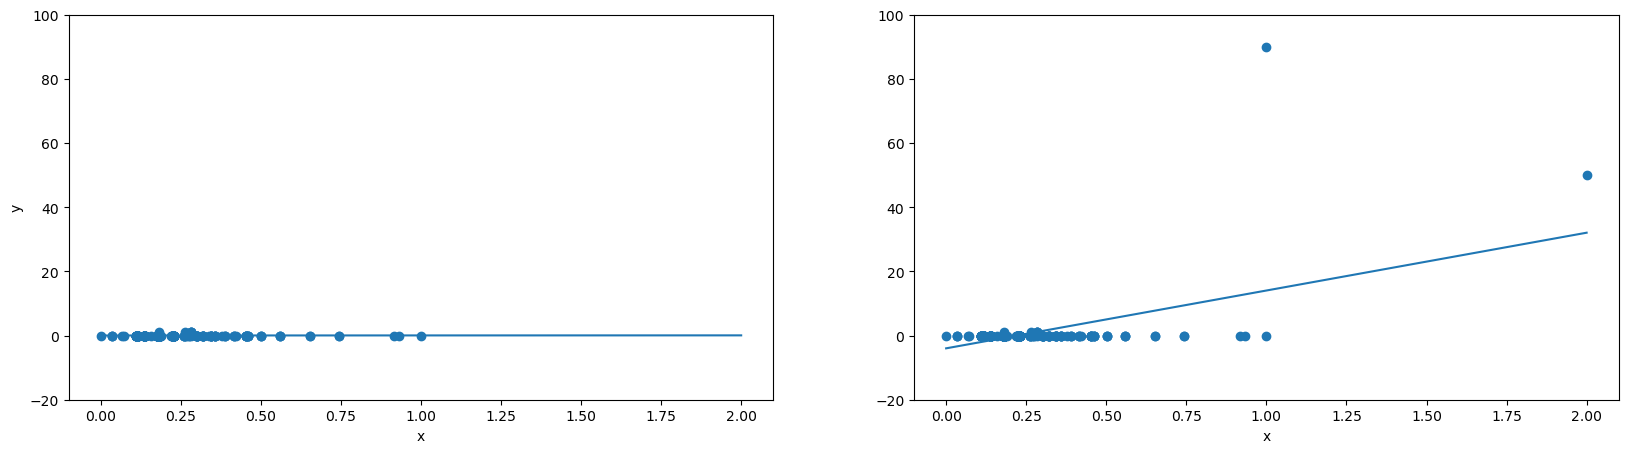

In [526]:
plt.figure(figsize = (20, 5))
plt.subplot(1, 2, 1)
scatter_points_and_plot_line_MSE(X_subset)
plt.ylim(-20, 100)
plt.xlabel('x')
plt.ylabel('y')
plt.subplot(1, 2, 2)
scatter_points_and_plot_line_MSE(X_subset_modified)
plt.ylim(-20, 100)
plt.xlabel('x')

In [528]:
# Из-за шумовых объектов прямая достаточно сильно изменила наклон. Поэтому вместо MSE часто использует MAE
# Теперь обучим регрессию, оптимизируя MAE. В sklearn такая регрессия не реализована, но можно использовать модуль statsmodels

In [530]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [533]:
def scatter_points_and_plot_line_MAE(X_subset):
    mod = smf.quantreg('f15 ~ f7', pd.DataFrame(data = X_subset, columns = ['f7', 'f15']))
    res = mod.fit(q = 0.5)
    plt.scatter(X_subset[:, 0], X_subset[:, 1])
    grid = np.linspace(0, 2, 100)
    plt.plot(grid, grid * res.params['f7'] + res.params['Intercept'])
    return mod, res

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/statsmodels/regression/quantile_regression.py:206: RuntimeWarning: divide by zero encountered in scalar divide
  d = np.where(e > 0, (q/fhat0)**2, ((1-q)/fhat0)**2)
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/statsmodels/regression/quantile_regression.py:208: RuntimeWarning: invalid value encountered in multiply
  xtdx = np.dot(exog.T * d[np.newaxis, :], exog)
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/statsmodels/regression/quantile_regression.py:219: RuntimeWarning: divide by zero encountered in scalar divide
  lfit.sparsity = 1. / fhat0


Text(0.5, 0, 'x')

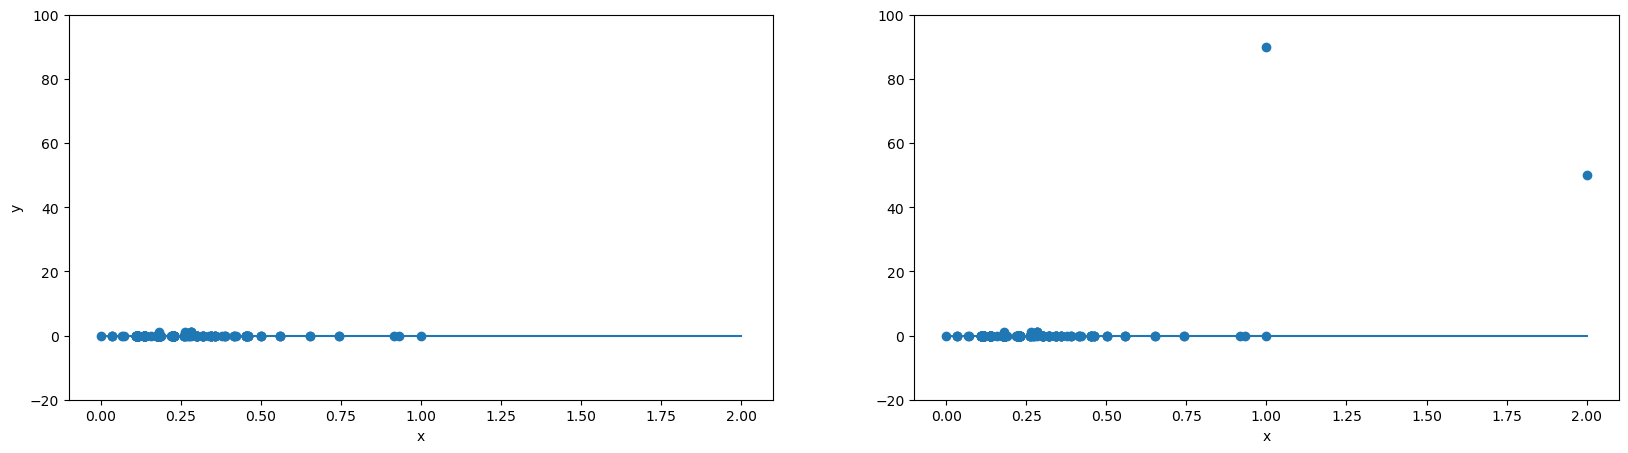

In [535]:
plt.figure(figsize = (20, 5))
plt.subplot(1, 2, 1)
model, result = scatter_points_and_plot_line_MAE(X_subset)
plt.ylim(-20, 100)
plt.xlabel('x')
plt.ylabel('y')
plt.subplot(1, 2, 2)
model, result = scatter_points_and_plot_line_MAE(X_subset_modified)
plt.ylim(-20, 100)
plt.xlabel('x')

In [537]:
# прямая не изменила направление из-за выбросов